Linear Regression:
R² Score: 0.239
MSE: 6191.2877

Ridge Regression:
R² Score: 0.2393
MSE: 6188.5706

Predictions saved to 'house_price_predictions.csv'.


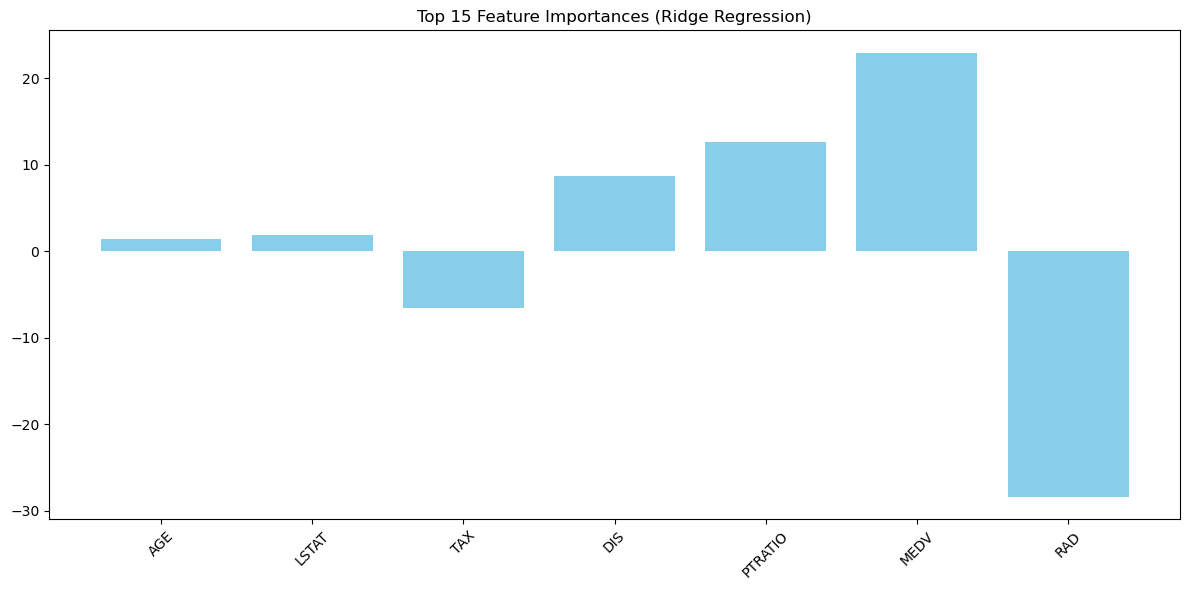

Feature importance plot saved to 'feature_importance.png'.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("D:\\house\\boston.csv")
df = df.drop(columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM'])
df = df.fillna(df.median(numeric_only=True))
df = pd.get_dummies(df, drop_first=True)

X = df.drop('B', axis=1)
y = df['B']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_preds = ridge_model.predict(X_test_scaled)

lr_r2 = r2_score(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)

ridge_r2 = r2_score(y_test, ridge_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)

print("Linear Regression:")
print("R² Score:", round(lr_r2, 4))
print("MSE:", round(lr_mse, 4))

print("\nRidge Regression:")
print("R² Score:", round(ridge_r2, 4))
print("MSE:", round(ridge_mse, 4))
output = pd.DataFrame({
    'Actual': y_test.values,
    'Linear_Predicted': lr_preds,
    'Ridge_Predicted': ridge_preds
})
output.to_csv("D:\\house\\house_price_predictions.csv", index=False)
print("\nPredictions saved to 'house_price_predictions.csv'.")
feature_names = X.columns
coefficients = ridge_model.coef_

top_indices = np.argsort(np.abs(coefficients))[-15:]

plt.figure(figsize=(12, 6))
plt.bar(feature_names[top_indices], coefficients[top_indices], color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 15 Feature Importances (Ridge Regression)")
plt.tight_layout()
plt.savefig("D:\\house\\feature_importance.png")
plt.show()
print("Feature importance plot saved to 'feature_importance.png'.")
